In [2]:
#隨機出現超預算特徵及統後超預算的次數#重複值整理0510
import docx
import re
import random
import os
import pandas as pd

#爬資料夾內的word
dirpath=r"C:\Users\JerryLiu\Desktop\公司\自動決包說明\python" #輸入data放置指定資料夾
result =next(os.walk(dirpath))
para_all=[]

for ele in result[2]:
    if ele.count(".docx") == 1:
        print("{} 爬取完畢！".format(ele))
        file=docx.Document(ele)               
        for para in file.paragraphs: #輸出每一段的內容
            para_all.append(para.text)

paranew = "".join(para_all)
filter_data=re.split("。|;|:|；|：|、|應|係|屬|案|,|，|且|及",paranew) #分句的 key

count_less=0
count_scatter=0
cnt_fire=0
cnt_high=0
cnt_safety=0
cnt_repye=0
cnt_manytime=0
cnt_narrow=0
less=[]
fire=[]
high=[]
safety=[]
repye=[]
narrow=[]
scatter=[]
manytime=[]
#篩選儲存特徵值的句子
for ele in filter_data:          
    if ele.count("零星")==1:
        less.append(ele.replace(" ","")) #代入並去除空白
    elif ele.count("高空")==1:
        high.append(ele.replace(" ",""))             
    elif ele.count("工安")==1:
        safety.append(ele.replace(" ",""))
    elif ele.count("歲修")==1:
        repye.append(ele.replace(" ",""))
    elif ele.count("定檢")==1:
        repye.append(ele.replace(" ",""))
    elif ele.count("分次")==1:
        manytime.append(ele.replace(" ",""))
    elif ele.count("狹窄")==1:
        narrow.append(ele.replace(" ",""))
    elif ele.count("無火")==1:
        fire.append(ele.replace(" ","")) 
    elif ele.count("明火")==1:
        fire.append(ele.replace(" ",""))
    elif ele.count("分散")==1:
        scatter.append(ele.replace(" ",""))
        
# 特徵值計數 
    count_less=count_less+ele.count("零星") 
    count_scatter=count_scatter+ele.count("分散")
    cnt_fire=cnt_fire+ele.count("無火")+ele.count("明火")
    cnt_high=cnt_high+ele.count("高空")
    cnt_safety=cnt_safety+ele.count("工安")
    cnt_repye=cnt_repye+ele.count("歲修")+ele.count("定檢")
    cnt_manytime=cnt_manytime+ele.count("分次")
    cnt_narrow=cnt_narrow+ele.count("狹窄")
#結果 
# print("-"*40,"超預算說明","-"*40)    
# print("隨機出現的編號:","高空:",random.randrange(0,len(high))
#       ,"狹窄:",random.randrange(0,len(narrow))
#       ,"工安:",random.randrange(0,len(safety))) 
# print(high[random.randrange(0,len(high))],"，"
#      ,narrow[random.randrange(0,len(narrow))],"，"
#      ,safety[random.randrange(0,len(safety))])
# print("-"*91)

print("零星出現的次數:{}次".format(count_less)) 
print("分散出現的次數:{}次".format(count_scatter))
print("無火、明火出現的次數:{}次".format(cnt_fire))
print("高空出現的次數:{}次".format(cnt_high))
print("工安出現的次數:{}次".format(cnt_safety))
print("歲修、定檢出現的次數:{}次".format(cnt_repye))
print("狹窄出現的次數:{}次".format(cnt_narrow))
print("分次出現的次數:{}次".format(cnt_manytime))

new_less = list(set(less)) #set寫法  
temp_fire = pd.Series(fire) #pandas寫法
new_fire = list(temp_fire.drop_duplicates(keep="last")) #刪除重複(從尾巴去除)
new_high = list(set(high))
new_safety= list(set(safety))
new_repye=list(set(repye))
new_narrow=list(set(narrow))
new_scatter=list(set(scatter))
new_manytime=list(set(manytime))
print("-"*100)
print("零星可用的句數:{}次".format(len(new_less))) 
print("分散可用的句數:{}次".format(len(new_scatter)))
print("無火、明火可用的句數:{}次".format(len(new_fire)))
print("高空可用的句數:{}次".format(len(new_high)))
print("工安可用的句數:{}次".format(len(new_safety)))
print("歲修、定檢可用的句數次數:{}次".format(len(new_repye)))
print("狹窄可用的句數:{}次".format(len(new_narrow)))
print("分次可用的句數:{}次".format(len(new_manytime)))

案件超預算.docx 爬取完畢！
零星出現的次數:171次
分散出現的次數:148次
無火、明火出現的次數:91次
高空出現的次數:120次
工安出現的次數:75次
歲修、定檢出現的次數:496次
狹窄出現的次數:172次
分次出現的次數:31次
----------------------------------------------------------------------------------------------------
零星可用的句數:59次
分散可用的句數:60次
無火、明火可用的句數:51次
高空可用的句數:52次
工安可用的句數:23次
歲修、定檢可用的句數次數:221次
狹窄可用的句數:67次
分次可用的句數:21次


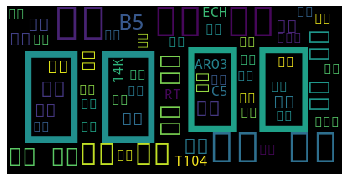

In [31]:
import docx
import re
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
# dirpath=r"C:\Users\JerryLiu\Desktop\公司\自動決包說明\python" #輸入data放置指定資料夾
# result =next(os.walk(dirpath))
# para_all=[]

# for ele in result[2]:
#     if ele.count(".docx") == 1:
#         print("{} 爬取完畢！".format(ele))
#         file=docx.Document(ele)               
#         for para in file.paragraphs: #輸出每一段的內容
#             para_all.append(para.text)
#text_from_file_with_apath = "".join(para_all)
#text_from_file_with_apath = open('wordcloudtest8.txt')
with open('wordcloudtest.txt',encoding="big5",errors='ignore') as f:
    text_from_file_with_apath=f.read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
my_wordcloud = WordCloud().generate(wl_space_split)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import docx
import re
import random
import os
import pandas as pd
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import jieba 
import matplotlib.pyplot as plt

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

# dirpath=r"C:\Users\JerryLiu\Desktop\公司\自動決包說明\python" #輸入data放置指定資料夾
# result =next(os.walk(dirpath))
# para_all=[]

# for ele in result[2]:
#     if ele.count(".docx") == 1:
#         print("{} 爬取完畢！".format(ele))
#         file=docx.Document(ele)               
#         for para in file.paragraphs: #輸出每一段的內容
#             para_all.append(para.text)
with open('wordcloudtest.txt',encoding="big5",errors='ignore') as f:
    fr=f.read()            
fr = "".join(para_all)

fr=fr.replace('\n',',')

frt=fr.split(',')

frt1=[(x,y) for x in frt if frt.index(x) % 2==0 for y in frt if frt.index(y)==frt.index(x)+1]

str1=dict(frt1)

for i in str1.keys():

    str1[i]=int(round(float(str1[i])))

backgroud_Image = plt.imread('221.jpg')

wc = WordCloud( background_color = 'white', # 設置背景顏色

mask = backgroud_Image, # 設置背景圖片

max_words = 170, # 設置最大現實的字數

# 設置停用詞

font_path = 'C:\\Windows\\Fonts\\simhei.ttf',# 設置字體格式，如不設置顯示不了中文

max_font_size = 80, # 設置字體最大值

random_state = 40, # 設置有多 少種隨機生成狀態，即有多少種配色方案

)

#wc.generate(text)

wc.generate_from_frequencies(str1)

image_colors = ImageColorGenerator(backgroud_Image)

wc.recolor(color_func = image_colors)

plt.imshow(wc)

plt.axis('off')

plt.show()



